1. Settingup environment
2. Fething HTML content: we will get html as string. 
3. Parse HTML content and give Tree like structure will be given using Python
4. Parse HTML: convert HTML (which is in form of string). use BeautifulSoup module to create tree like stucture for DOM :The Document Object Model (DOM) is a programming interface for web documents(HTML or XML)
5. HTML tree travesal: using BeautifulSoup, contents of tree is manipulate


In [12]:
import bs4
import requests
import time
import random as ran
import sys
import pandas as pd

In [15]:
url = 'https://www.imdb.com/search/title?release_date=2018&sort=boxoffice_gross_us,desc&start=1'

source = requests.get(url).text
soup = bs4.BeautifulSoup(source,'html.parser')
print(soup)



<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2018-01-01 and 2018-12-31
(Sorted by US Box Office Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?release_date=2018-01-01,2018-12-31" rel="canonical"/>
<meta content="http://www.i

In [16]:
print(soup.prettify)

<bound method Tag.prettify of 
<!DOCTYPE html>

<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>Released between 2018-01-01 and 2018-12-31
(Sorted by US Box Office Descending) - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
</script>
<link href="https://www.imdb.com/search/title/?release_date=2018-01-01,2018-12-31" rel="canonical"

#### Tree Structure

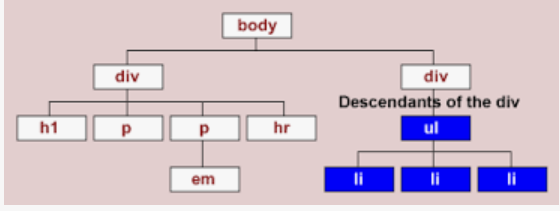

In [17]:
title1= soup.title
print(title1)

<title>Released between 2018-01-01 and 2018-12-31
(Sorted by US Box Office Descending) - IMDb</title>


In [18]:
#to check the type of title
type(title1)

bs4.element.Tag

In [19]:
print(type(title1))
# (title1) belongs to class tag which bs4's element

<class 'bs4.element.Tag'>


#### Common Types of Object 
1. Tag
2. NavigableString
3. BeautifulSoup 
4. Comment

In [20]:
print(type(soup)) #object of beautiful soup 

<class 'bs4.BeautifulSoup'>


In [23]:
print(type(title1.string)) #Navigable string: these have special string functions comparitvely to 
#python strings. 

<class 'bs4.element.NavigableString'>


In [24]:
print(type(title1)) #tag

<class 'bs4.element.Tag'>


In [26]:
#to get paragraphs
paras= soup.find_all('p')
print(paras)
#this returns paragraphs and along with that even anchors will be displayed which are within paragraphs

[<p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>, <p class="text-muted">
T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.</p>, <p class="">
    Director:
<a href="/name/nm3363032/">Ryan Coogler</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1569276/">Chadwick Boseman</a>, 
<a href="/name/nm0430107/">Michael B. Jordan</a>, 
<a href="/name/nm2143282/">Lupita Nyong'o</a>, 
<a href="/name/nm1775091/">Danai Gurira</a>
</p>, <p class="sort-num_votes-visible">
<span class="text-muted">Votes:</span>
<span data-value="777006" name="nv">777,006</span>
<span class="ghost">|</span> <span class="text-muted">Gross:</span>
<span data-value="700,059,566" name="nv">$700.06M</span>
</p>, <p cl

In [27]:
anchors= soup.find_all('a')
print(anchors)

[<a href="/?ref_=nv_home"><svg class="ipc-logo drawer-logo" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.3021941,13.486

In [28]:
# 1st element of html page 

print(soup.find('p'))
#using find() without all:this returns first paragraph. 

<p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>


In [30]:
#In above example, I have got 1st paragraph with all details like 
#to return the class of 1st paragraph. 
print(soup.find('p')['class'])

['text-muted']


In [31]:
print(soup.find('p')['id'])
#there is no id in 1st paragraph, so I will get error


KeyError: 'id'

In [34]:
#find all elements with class lead 
print(soup.find_all('p', class_= 'lead'))
#there is no element whose class is lead

[]


In [36]:
print(soup.find_all('p', class_= 'text-muted'))

[<p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>, <p class="text-muted">
T'Challa, heir to the hidden but advanced kingdom of Wakanda, must step forward to lead his people into a new future and must confront a challenger from his country's past.</p>, <p class="text-muted">
<span class="certificate">PG13</span>
<span class="ghost">|</span>
<span class="runtime">149 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>, <p class="text-muted">
The Avengers and their allies must be willing to sacrifice all in an attempt to defeat the powerful Thanos before his blitz of devastation and ruin puts an end to the universe.</p>, <p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">118 min</span>
<span class="g

In [37]:
#to get elements from tags/soup from paragraph 
print(soup.find('p').get_text)


<bound method PageElement.get_text of <p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>>


In [38]:
print(soup.find('p'))

<p class="text-muted">
<span class="certificate">PG</span>
<span class="ghost">|</span>
<span class="runtime">134 min</span>
<span class="ghost">|</span>
<span class="genre">
Action, Adventure, Sci-Fi            </span>
</p>
